<a href="https://colab.research.google.com/github/mervenurerdogan/LungCancerCustomModel2/blob/main/LUNGSON_XResnext34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *

In [4]:
path=Path('/content/gdrive/MyDrive/BINARY')

In [5]:
train_fnames = get_image_files(path)

In [6]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.20,seed=41),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=[*aug_transforms(size=256, max_warp=0), Normalize.from_stats(*imagenet_stats)]
                 
                 
)

In [7]:
dls=dblock.dataloaders(train_fnames)

In [8]:
dls.c,len(dls.train_ds),len(dls.valid_ds)

(2, 544, 136)

In [9]:
dls.vocab

['CANCER', 'NORMAL']

In [11]:
learn=cnn_learner(dls,xse_resnext34_deep, pretrained=True,metrics=accuracy)

In [12]:
print(learn.summary())

Sequential (Input shape: 64 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 128 x 128 
Conv2d                                    864        False     
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       False     
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 128 x 128 
Conv2d                                    18432      False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 64 x 64   
MaxPool2d                          

SuggestedLRs(valley=0.0012022644514217973)

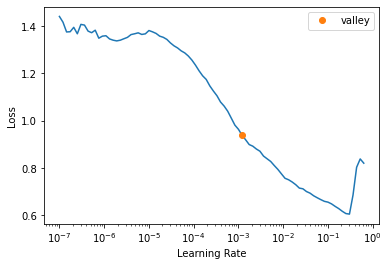

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(30,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.109618,0.726672,0.727941,00:23
1,0.849588,0.240209,0.889706,00:23
2,0.666184,0.169161,0.926471,00:23
3,0.543987,0.176221,0.926471,00:23
4,0.460611,0.138304,0.948529,00:23
5,0.413566,0.144834,0.955882,00:23
6,0.354008,0.098799,0.963235,00:23
7,0.313209,0.103821,0.955882,00:23
8,0.291377,0.111119,0.955882,00:23
9,0.268146,0.066122,0.963235,00:23


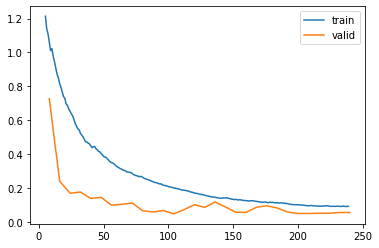

In [15]:
learn.recorder.plot_loss()

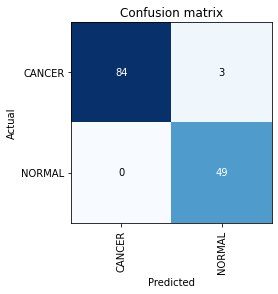

In [16]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
print("Number of examples in testing:", len(dls.valid_ds))

Number of examples in testing: 136


In [18]:
preds, targs = learn.tta()
accuracy(preds, targs).item()

0.9779411554336548

In [19]:
interp.most_confused()

[('CANCER', 'NORMAL', 3)]

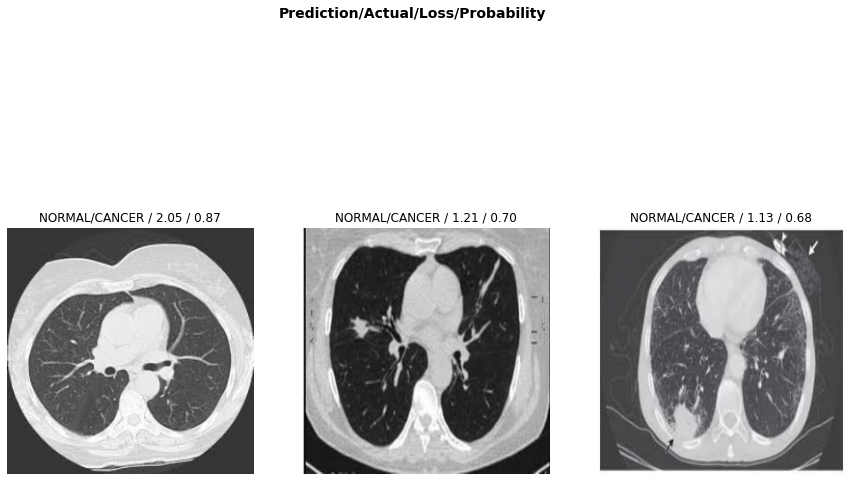

In [21]:
interp.plot_top_losses(3, figsize=(15,10))

In [22]:
interp.print_classification_report()

              precision    recall  f1-score   support

      CANCER       1.00      0.97      0.98        87
      NORMAL       0.94      1.00      0.97        49

    accuracy                           0.98       136
   macro avg       0.97      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



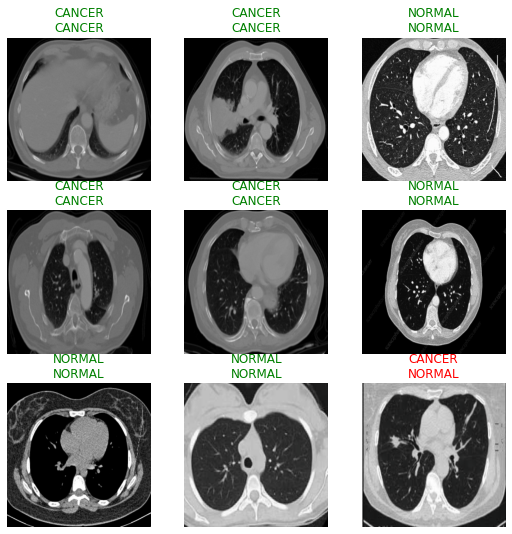

In [23]:
learn.show_results()

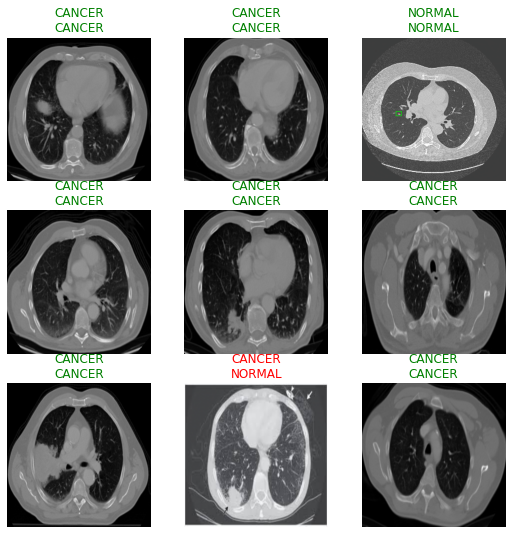

In [26]:
learn.show_results()

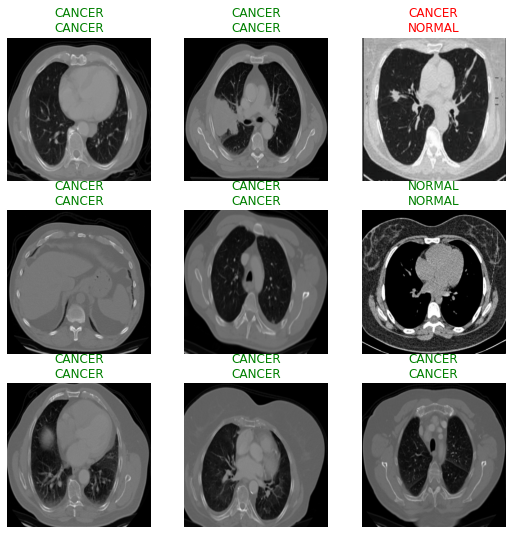

In [30]:
learn.show_results()

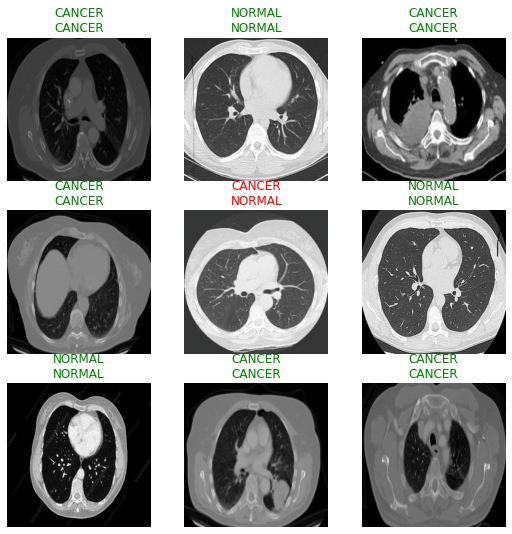

In [31]:
learn.show_results()

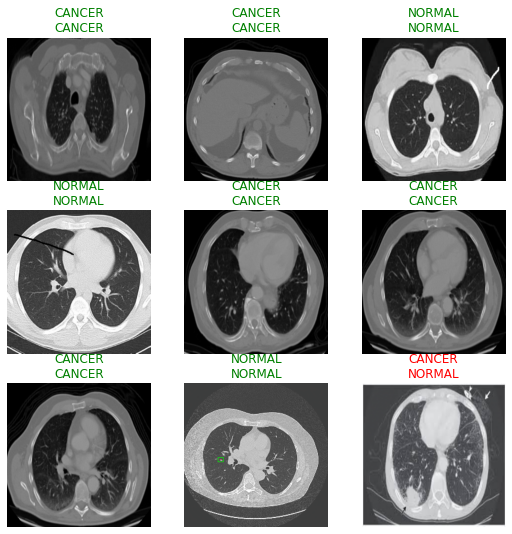

In [37]:
learn.show_results()

In [40]:
losses,idxs = interp.top_losses(3)
print(idxs)

TensorBase([46, 75, 17])


In [41]:
dls.valid_ds.items[46]

Path('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (194).png')

In [42]:
dls.valid_ds.items[75]

Path('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (465).png')

In [43]:
dls.valid_ds.items[17]

Path('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (460).png')

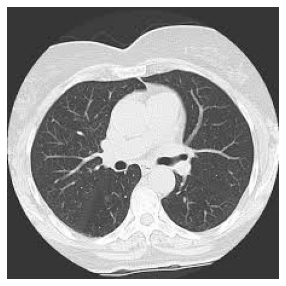

In [44]:
img = PILImage.create('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (194).png')
img.show()

In [45]:
is_cancer,_,probs = learn.predict(img)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.13


In [46]:
learn.predict(img)

('NORMAL', TensorBase(1), TensorBase([0.1284, 0.8716]))

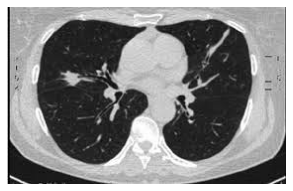

In [47]:
img = PILImage.create('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (465).png')
img.show()

In [48]:
is_cancer,_,probs = learn.predict(img)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.30


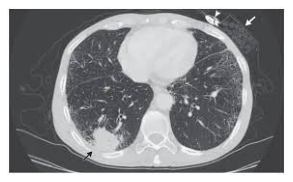

In [49]:
img = PILImage.create('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (460).png')
img.show()

In [50]:
is_cancer,_,probs = learn.predict(img)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.32


In [51]:
btn=widgets.FileUpload() 
btn

FileUpload(value={}, description='Upload')

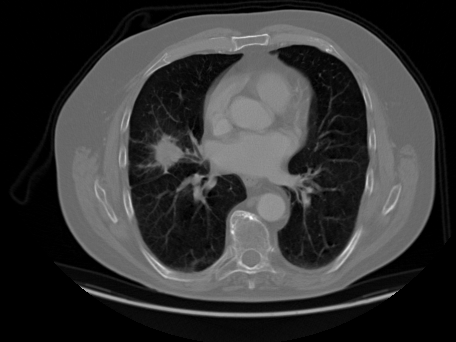

In [55]:
img_out=PILImage.create(btn.data[-1])
img_out

In [56]:
is_cancer,_,probs = learn.predict(img_out)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: CANCER
Probability it's a CANCER: 1.00


In [57]:
btn=widgets.FileUpload() 
btn

FileUpload(value={}, description='Upload')

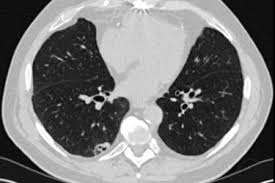

In [58]:
img_out=PILImage.create(btn.data[-1])
img_out

In [59]:
is_cancer,_,probs = learn.predict(img_out)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.04


In [ ]:
learn.export('NewDATABinaryCustomModel_Export.pkl')

In [ ]:
learn.save('NewDATABinaryCustomModel')

Path('models/NewDATABinaryCustomModel.pth')